In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/sample_data/ToyotaCorolla - MLR.csv')

In [3]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
df.rename(columns = {'Age_08_04':'Age'}, inplace =True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [6]:
df.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
df.head()  #Price - Target

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [8]:
df.shape

(1436, 11)

In [9]:
df.drop('Cylinders',axis =1, inplace = True) # cylinders column has the same value throughout

In [10]:
df = pd.get_dummies(df,columns=['Fuel_Type'], dtype=int)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_df,test_df = train_test_split(df,test_size =0.2,random_state =42)

In [13]:
#sns.pairplot(train_df)

In [14]:
train_df.corr()

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.878189,-0.568330,0.303786,0.033575,0.124721,0.172863,0.050277,0.581960,-0.045172,0.047684,-0.028893
Age,-0.878189,1.000000,0.504760,-0.152625,0.034572,-0.095736,-0.136160,0.004676,-0.472199,0.003524,-0.091232,0.085246
KM,-0.568330,0.504760,1.000000,-0.339023,-0.079166,0.093343,-0.031072,0.013898,-0.011021,0.159370,0.412461,-0.448767
HP,0.303786,-0.152625,-0.339023,1.000000,0.015812,0.029753,0.074866,0.197287,0.065510,0.072352,-0.538924,0.484937
Automatic,0.033575,0.034572,-0.079166,0.015812,1.000000,0.080434,-0.017765,-0.110506,0.065480,0.001169,-0.087547,0.082603
cc,0.124721,-0.095736,0.093343,0.029753,0.080434,1.000000,0.068792,0.012461,0.333348,0.005081,0.304745,-0.290842
Doors,0.172863,-0.136160,-0.031072,0.074866,-0.017765,0.068792,1.000000,-0.171682,0.279692,0.010206,0.014475,-0.017416
Gears,0.050277,0.004676,0.013898,0.197287,-0.110506,0.012461,-0.171682,1.000000,0.009793,-0.053622,-0.050252,0.067040
Weight,0.581960,-0.472199,-0.011021,0.065510,0.065480,0.333348,0.279692,0.009793,1.000000,0.060003,0.602039,-0.592635
Fuel_Type_CNG,-0.045172,0.003524,0.159370,0.072352,0.001169,0.005081,0.010206,-0.053622,0.060003,1.000000,-0.043812,-0.319927


<Axes: >

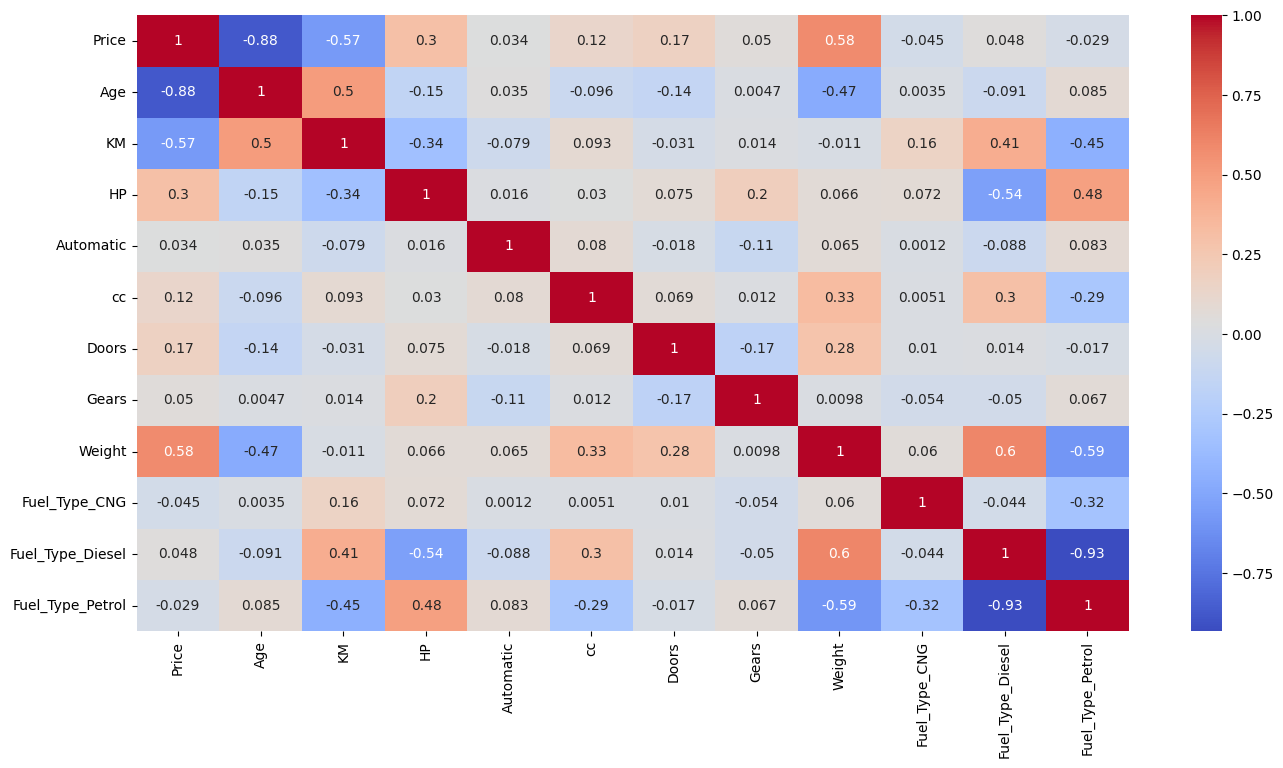

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(train_df.corr(), annot = True, cmap = 'coolwarm')

In [16]:
import statsmodels.formula.api as smf

In [17]:
df.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears',
       'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [18]:
model1 = smf.ols('Price~Age+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=train_df).fit()

In [19]:
#smf.ols('Price~Age',data=train_df).fit().summary()
#smf.ols('Price~KM',data=train_df).fit().summary()
#smf.ols('Price~Fuel_Type_Petrol',data=train_df).fit().summary()
#smf.ols('Price~Fuel_Type_Diesel',data=train_df).fit().summary()
#smf.ols('Price~Fuel_Type_CNG',data=train_df).fit().summary()
#smf.ols('Price~HP',data=train_df).fit().summary()
#smf.ols('Price~Automatic',data=train_df).fit().summary()
#smf.ols('Price~cc',data=train_df).fit().summary()
#smf.ols('Price~Doors',data=train_df).fit().summary()
#smf.ols('Price~Gears',data=train_df).fit().summary()
#smf.ols('Price~Weight',data=train_df).fit().summary()


In [20]:
train_df.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears',
       'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [21]:
model2 = smf.ols('Price~Age+KM+HP',data=train_df).fit()

In [22]:
model3 = smf.ols('Price~Age+Weight+KM+HP',data=train_df).fit()

In [23]:
model_summary={

               'Model':['Model 1','Model 2','Model 3'],
               'R-squared': [model1.rsquared, model2.rsquared, model3.rsquared],
               'Adjusted R-squared': [model1.rsquared_adj, model2.rsquared_adj, model3.rsquared_adj]
}

summary_df = pd.DataFrame(model_summary)

In [24]:
summary_df

,Model,R-squared,Adjusted R-squared
0,Model 1,0.870264,0.869123
1,Model 2,0.810089,0.809591
2,Model 3,0.864284,0.863809


In [25]:
# from these 3 models, model1 is the best fit as it has the highest r-sqaured and adj r-sqaured value.

In [26]:
# checking the residuals for model1
model1.resid

,0
899,423.215128
881,1091.945067
310,-612.762686
1145,-1598.989453
31,-505.656555
...,...
1095,-242.777742
1130,141.690448
1294,-983.646093
860,1149.266472


<Axes: ylabel='Count'>

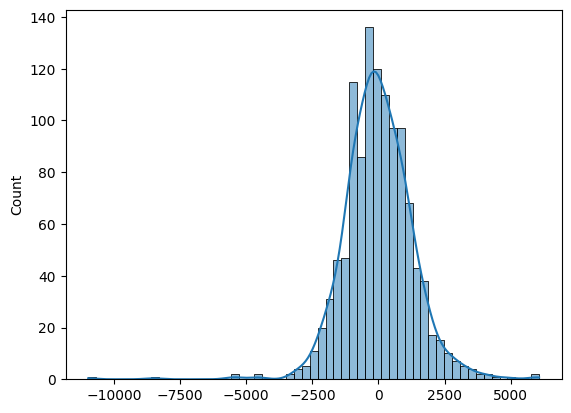

In [27]:
# creating a plot to check the distribution for model1 residue
sns.histplot(model1.resid,kde=True)

In [28]:
# the residuals are almost normally distribued with the presence of few outliers
#will now try to find error position with higher errors(outliers)

In [29]:
import statsmodels.api as sm

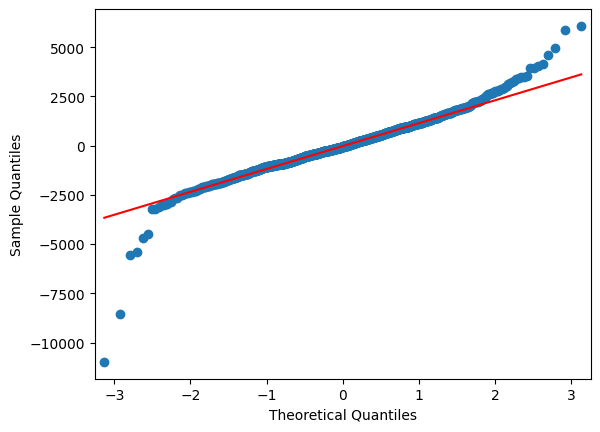

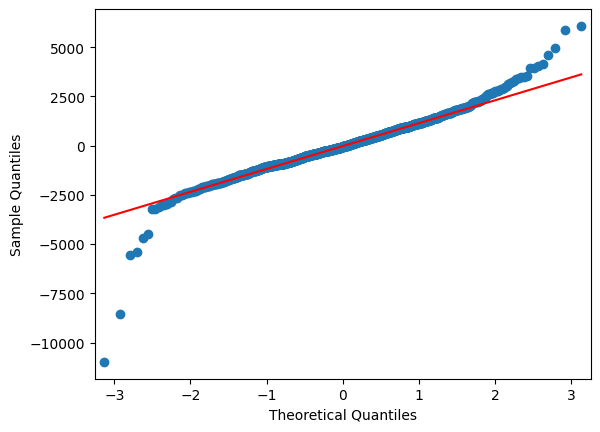

In [30]:
sm.qqplot(model1.resid,line='q')

In [31]:
list(np.where(model1.resid>5000))

[array([ 93, 345])]

In [32]:
list(np.where(model1.resid<-5000))

[array([ 286,  669,  691, 1025])]

In [33]:
# checking rsqaured after dropping outliers
model1_ = smf.ols('Price~Age+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=train_df.drop([93,345,286,691,1025])).fit()

In [34]:
model1_.rsquared

0.870242892171913

In [35]:
model1.rsquared  #even after removing high errors we are getting almost same r-square

0.8702643169608926

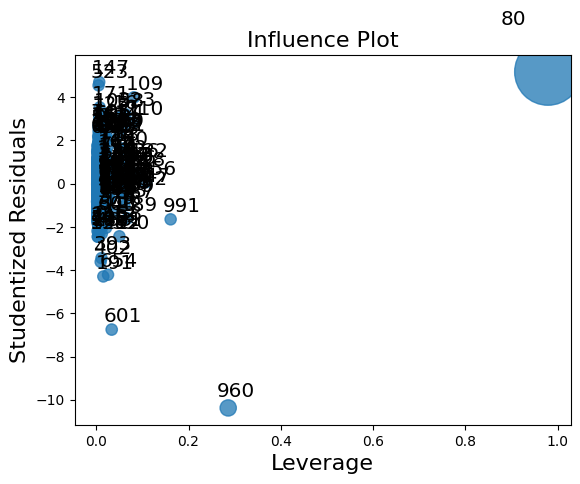

In [36]:
# Influence PLot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [37]:
# from influence plot we found 80 and 960 row as outlier

In [38]:
#cooks distance

In [39]:
model_influence = model1.get_influence()
(c,_) = model_influence.cooks_distance

In [40]:
np.round(c,3)

array([0., 0., 0., ..., 0., 0., 0.])

<StemContainer object of 3 artists>

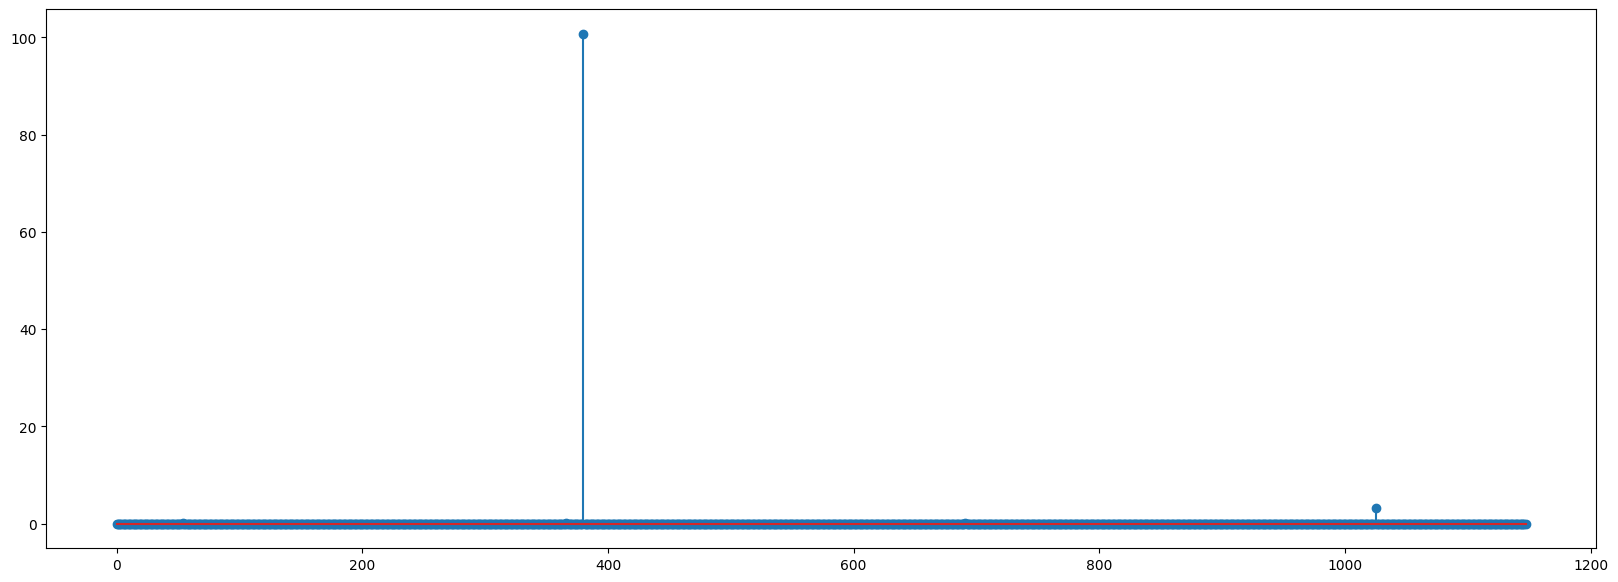

In [41]:
plt.figure(figsize = (20,7))
plt.stem(np.arange(len(train_df)), np.round(c, 3))

In [42]:
np.argmax(c) , np.max(c)

(380, 100.73305907709249)

In [43]:
# from observing the qqplot outliers were found in row - 93, 345, 286,  669,  691, 1025
# from the influence plot outliers were found in row - 80,960
# from cooks distance outliers were found in row - 380

In [44]:
# dropping outliers on the basis of inlfuence plot
newmodel = smf.ols('Price~Age+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=train_df.drop([80,960])).fit()

In [45]:
newmodel.rsquared

0.883449319247784

In [46]:
# after removing the outliers which are row 80 and 960, we saw a significant increase in rsqaure

In [47]:
rsq_Age = smf.ols('Age~KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=train_df).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=train_df).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=train_df).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_Automatic = smf.ols('Automatic~Age+KM+HP+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=train_df).fit().rsquared
vif_Automatic = 1/(1-rsq_Automatic)

rsq_cc = smf.ols('cc~Age+KM+HP+Automatic+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=train_df).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Age+KM+HP+Automatic+cc+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=train_df).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+KM+HP+Automatic+cc+Doors+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=train_df).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_Weight = smf.ols('Weight~Age+KM+HP+Automatic+cc+Doors+Gears+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=train_df).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

rsq_Fuel_Type_CNG = smf.ols('Fuel_Type_CNG~Age+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol',data=train_df).fit().rsquared
vif_Fuel_Type_CNG = 1/(1-rsq_Fuel_Type_CNG)

rsq_Fuel_Type_Diesel = smf.ols('Fuel_Type_Diesel~Age+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Petrol',data=train_df).fit().rsquared
vif_Fuel_Type_Diesel = 1/(1-rsq_Fuel_Type_Diesel)

rsq_Fuel_Type_Petrol = smf.ols('Fuel_Type_Petrol~Age+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_CNG',data=train_df).fit().rsquared
vif_Fuel_Type_Petrol = 1/(1-rsq_Fuel_Type_Petrol)

#Storing Vif values in dataframe
d1 = {'Variables' : ['Age','KM','HP','Automatic','cc','Doors','Gears','Weight','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol'],
      'VIF': [vif_Age,vif_KM,vif_HP,vif_Automatic,vif_cc,vif_Doors,vif_Gears,vif_Weight,vif_Fuel_Type_CNG,vif_Fuel_Type_Diesel,vif_Fuel_Type_Petrol]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

<ipython-input-47-d67dd443007b>:26: RuntimeWarning: divide by zero encountered in scalar divide
  vif_Fuel_Type_CNG = 1/(1-rsq_Fuel_Type_CNG)
<ipython-input-47-d67dd443007b>:29: RuntimeWarning: divide by zero encountered in scalar divide
  vif_Fuel_Type_Diesel = 1/(1-rsq_Fuel_Type_Diesel)
<ipython-input-47-d67dd443007b>:32: RuntimeWarning: divide by zero encountered in scalar divide
  vif_Fuel_Type_Petrol = 1/(1-rsq_Fuel_Type_Petrol)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Variables,VIF
0,Age,1.963717
1,KM,2.049863
2,HP,2.390991
3,Automatic,1.122540
4,cc,1.194085
5,Doors,1.227924
6,Gears,1.116589
7,Weight,3.880178
8,Fuel_Type_CNG,inf
9,Fuel_Type_Diesel,inf


In [48]:
# vif values of fuel type cng, diesel and petrol are giving values as infinite , which indicates high multicollinearity
# to tackle this, we will delete 2 of the fuel type and keep one to maintain 'no collinearity '

In [49]:
#creating a new dataframe after removing 2 features
train_df2 = train_df.copy().drop(columns=['Fuel_Type_CNG','Fuel_Type_Petrol'],axis=1)

In [50]:
train_df2

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel
899,9500,62,59295,86,0,1300,5,5,1035,0
881,9795,68,61568,110,0,1600,4,5,1035,0
310,12950,40,38653,110,0,1600,5,5,1080,0
1145,6450,75,101855,110,0,1600,5,5,1070,0
31,15750,22,35199,97,0,1400,3,5,1100,0
...,...,...,...,...,...,...,...,...,...,...
1095,6900,76,125778,110,0,1600,3,5,1050,0
1130,7950,73,107108,110,0,1600,3,5,1050,0
1294,6950,80,71740,110,0,1600,5,5,1070,0
860,9750,63,64690,86,0,1300,3,5,1020,0


In [51]:
# new model after the removal of 2 features
model4 = smf.ols('Price~Age+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Diesel',data=train_df2).fit()
model4.rsquared

0.8683647254476328

In [52]:
# Again checking the VIF after removals of features
rsq_Age = smf.ols('Age~KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Diesel',data=train_df2).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Diesel',data=train_df2).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Diesel',data=train_df2).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_Automatic = smf.ols('Automatic~Age+KM+HP+cc+Doors+Gears+Weight+Fuel_Type_Diesel',data=train_df2).fit().rsquared
vif_Automatic = 1/(1-rsq_Automatic)

rsq_cc = smf.ols('cc~Age+KM+HP+Automatic+Doors+Gears+Weight+Fuel_Type_Diesel',data=train_df2).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Age+KM+HP+Automatic+cc+Gears+Weight+Fuel_Type_Diesel',data=train_df2).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+KM+HP+Automatic+cc+Doors+Weight+Fuel_Type_Diesel',data=train_df2).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_Weight = smf.ols('Weight~Age+KM+HP+Automatic+cc+Doors+Gears+Fuel_Type_Diesel',data=train_df2).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)


rsq_Fuel_Type_Diesel = smf.ols('Fuel_Type_Diesel~Age+KM+HP+Automatic+cc+Doors+Gears+Weight',data=train_df2).fit().rsquared
vif_Fuel_Type_Diesel = 1/(1-rsq_Fuel_Type_Diesel)


#Storing Vif values in dataframe
d1 = {'Variables' : ['Age','KM','HP','Automatic','cc','Doors','Gears','Weight','Fuel_Type_Diesel'],
      'VIF': [vif_Age,vif_KM,vif_HP,vif_Automatic,vif_cc,vif_Doors,vif_Gears,vif_Weight,vif_Fuel_Type_Diesel]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age,1.954131
1,KM,1.909060
2,HP,2.390510
3,Automatic,1.121539
4,cc,1.194072
5,Doors,1.221171
6,Gears,1.107106
7,Weight,3.794926
8,Fuel_Type_Diesel,4.778355


In [53]:
# all vif are less than 5 indicating less multicollinearity

In [54]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
# User defined z = (x - mu)/sigma
def get_standardized_values(vals):
  return (vals - vals.mean())/vals.std()

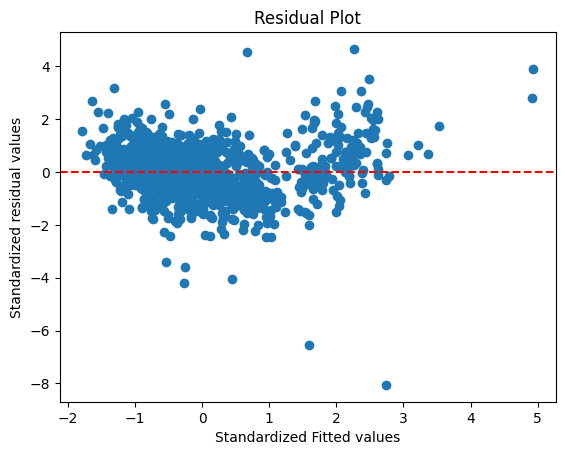

In [55]:
plt.scatter(get_standardized_values(model4.fittedvalues),get_standardized_values(model4.resid))
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

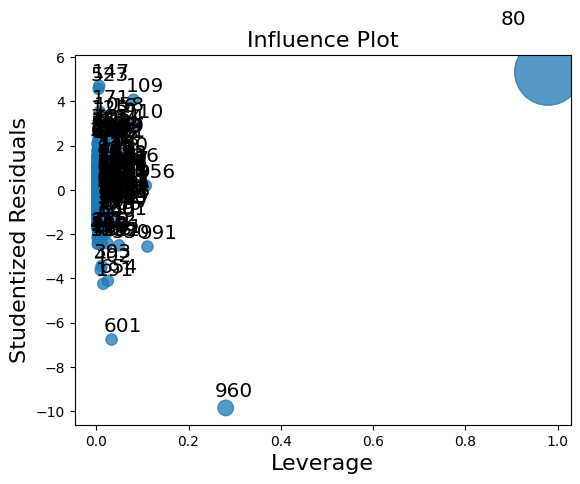

In [56]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model4)
plt.show()

In [57]:
# outliers found in row  80 and 960

In [58]:
model5 = smf.ols('Price~KM+HP+cc+Gears+Weight',data=train_df2.drop([80,960])).fit()

In [59]:
model5.rsquared

0.7096711514088467

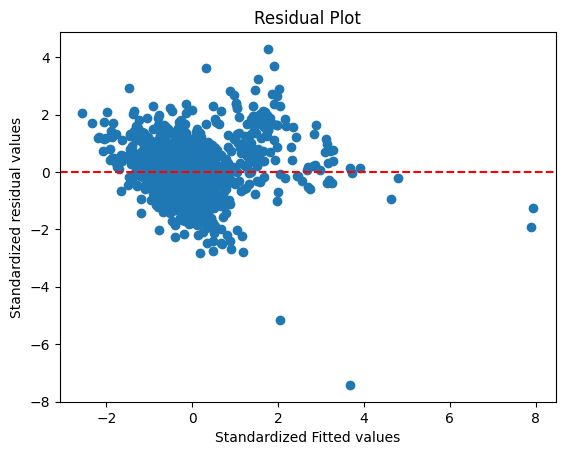

In [60]:
plt.scatter(get_standardized_values(model5.fittedvalues),get_standardized_values(model5.resid))
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [61]:
import statsmodels.api as sm

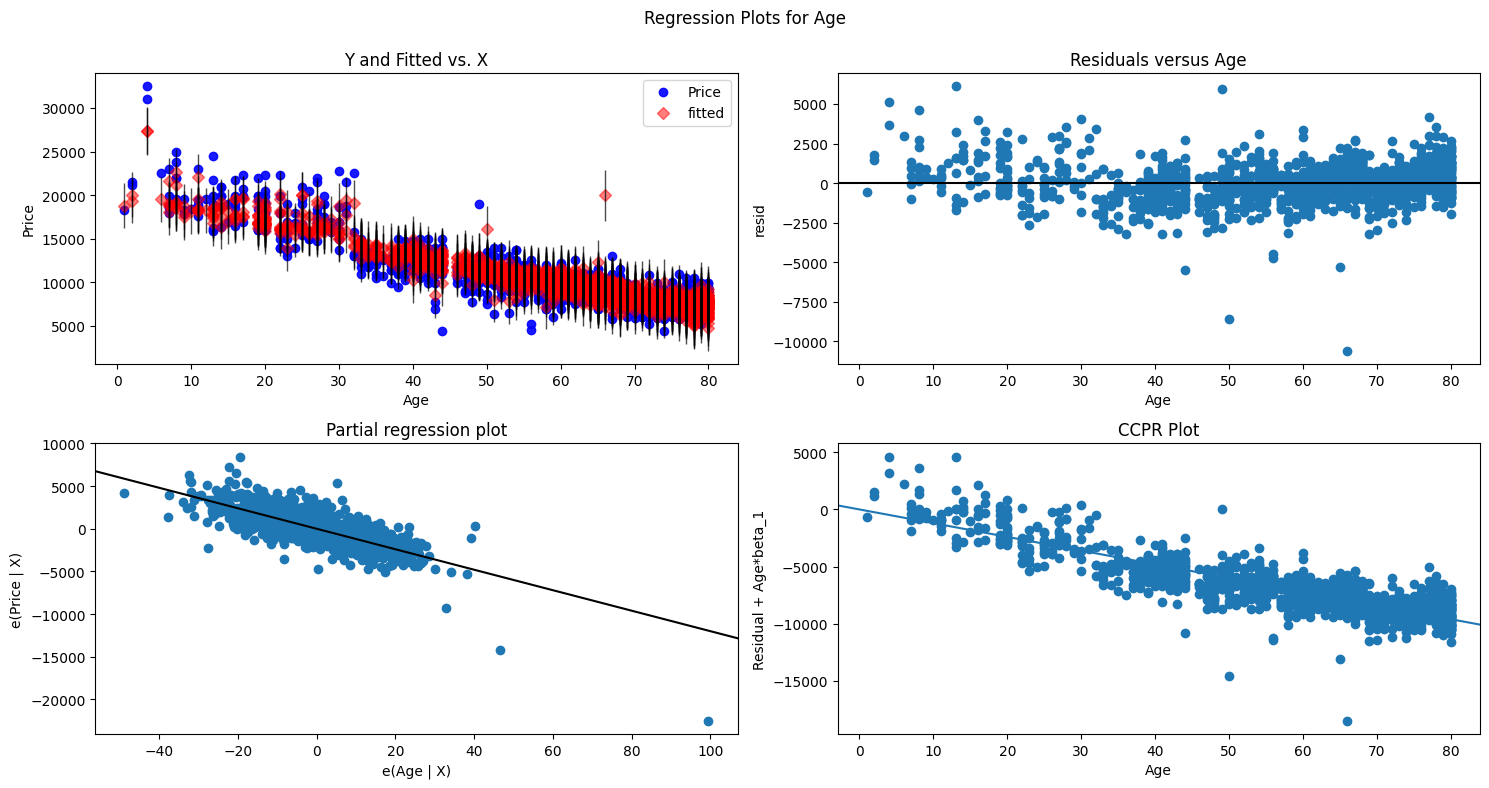

In [62]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "Age", fig=fig)
plt.show()

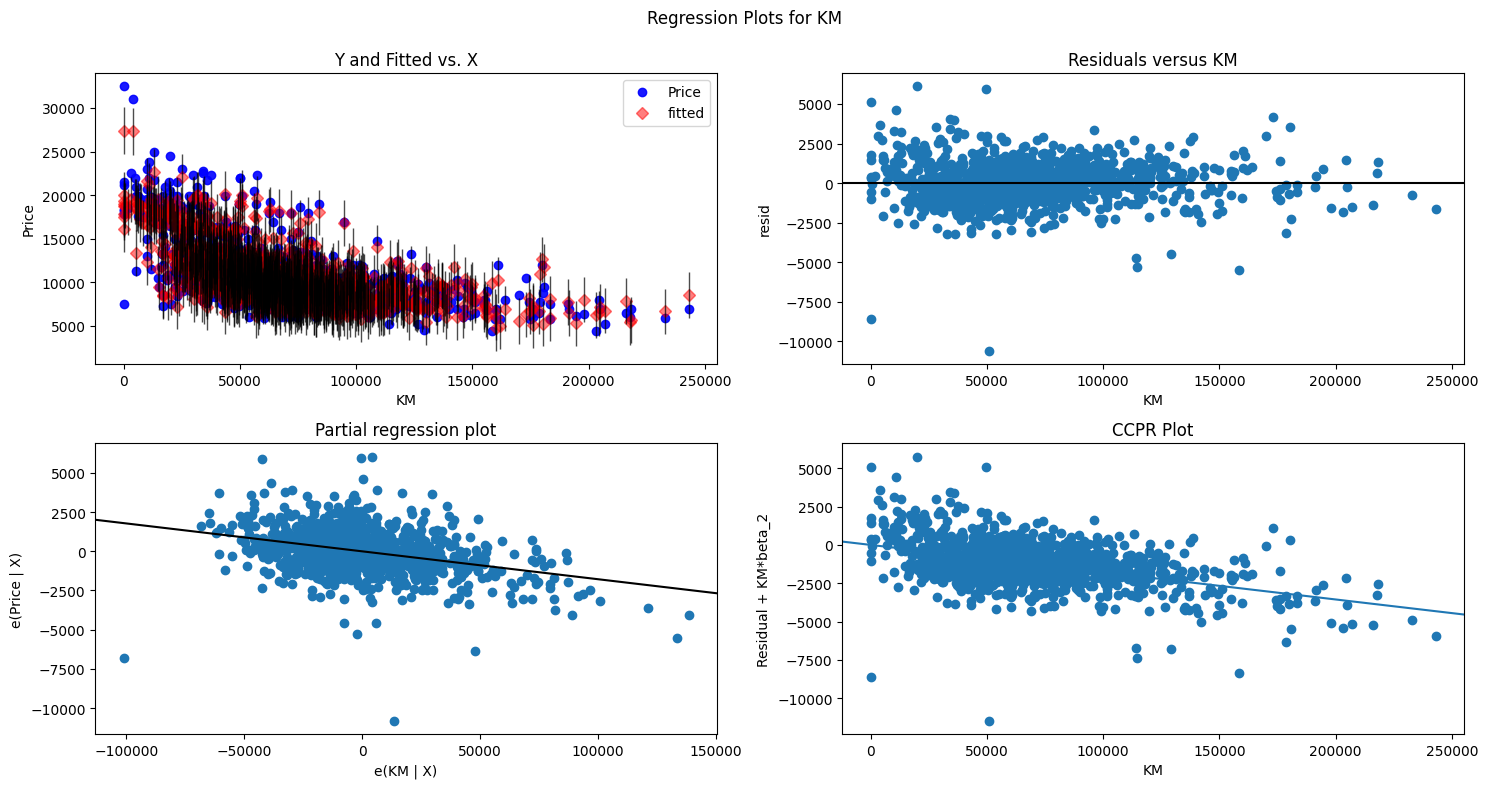

In [63]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "KM", fig=fig)
plt.show()

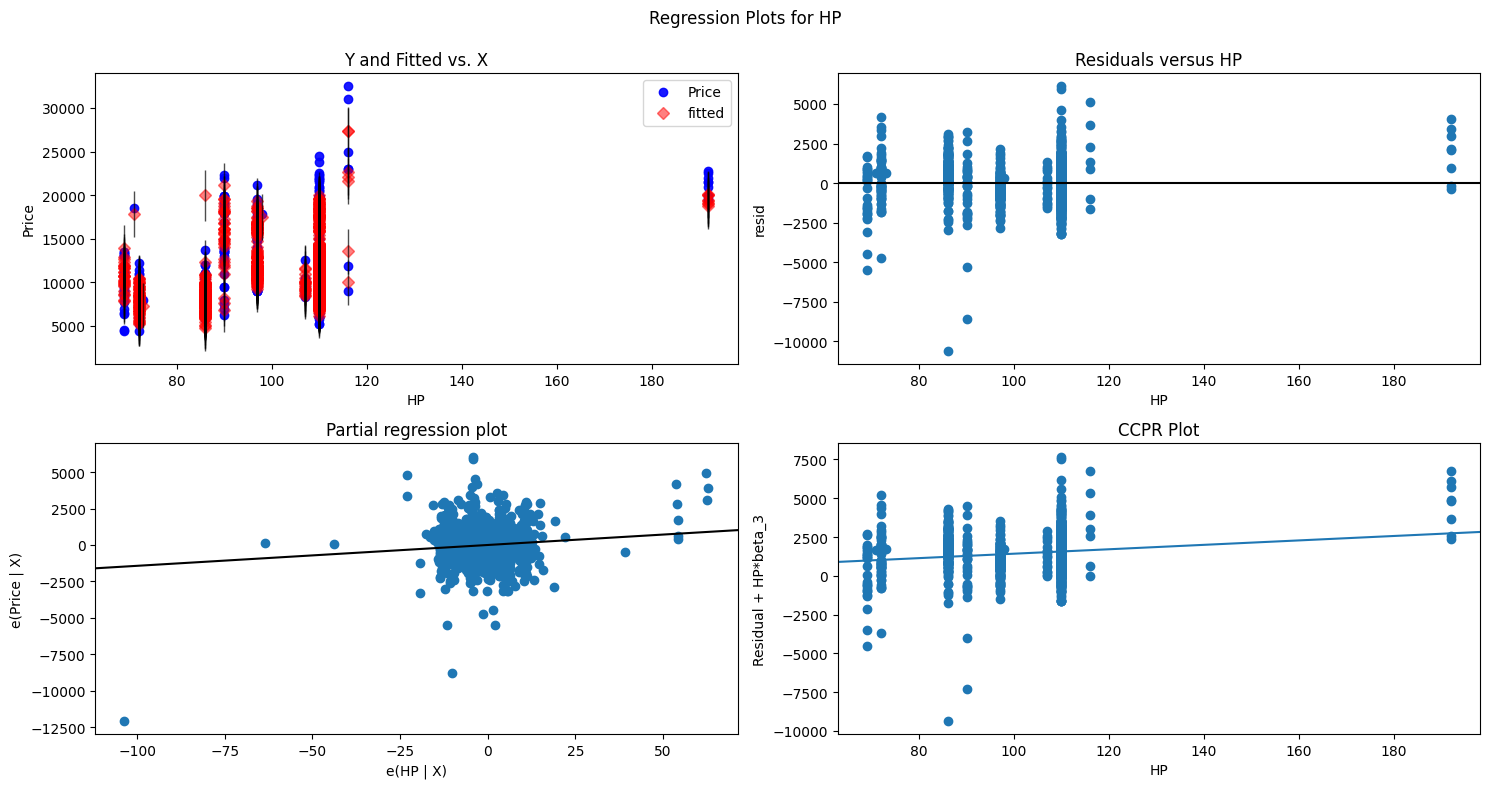

In [64]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "HP", fig=fig)
plt.show()

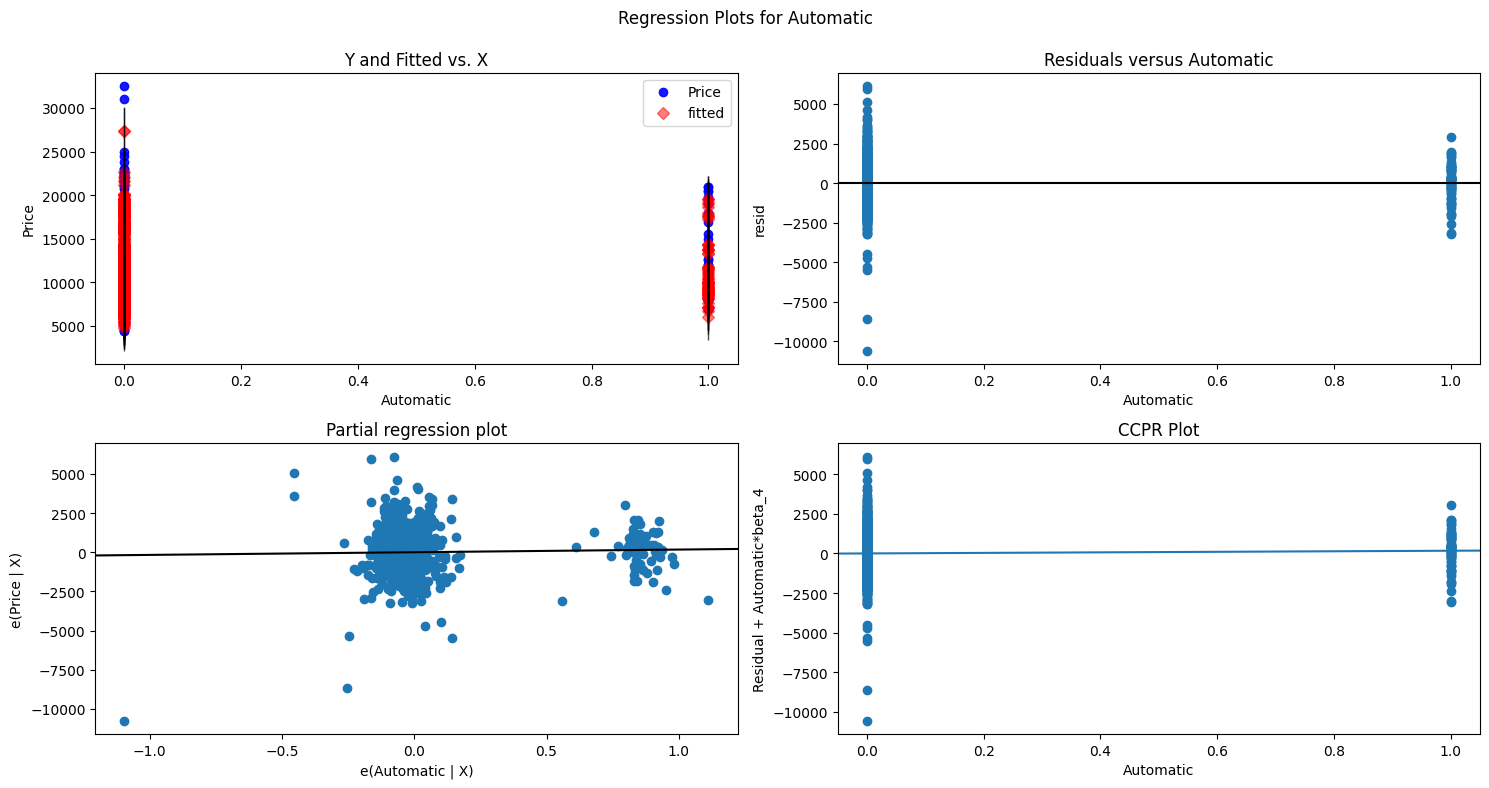

In [65]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "Automatic", fig=fig)
plt.show()

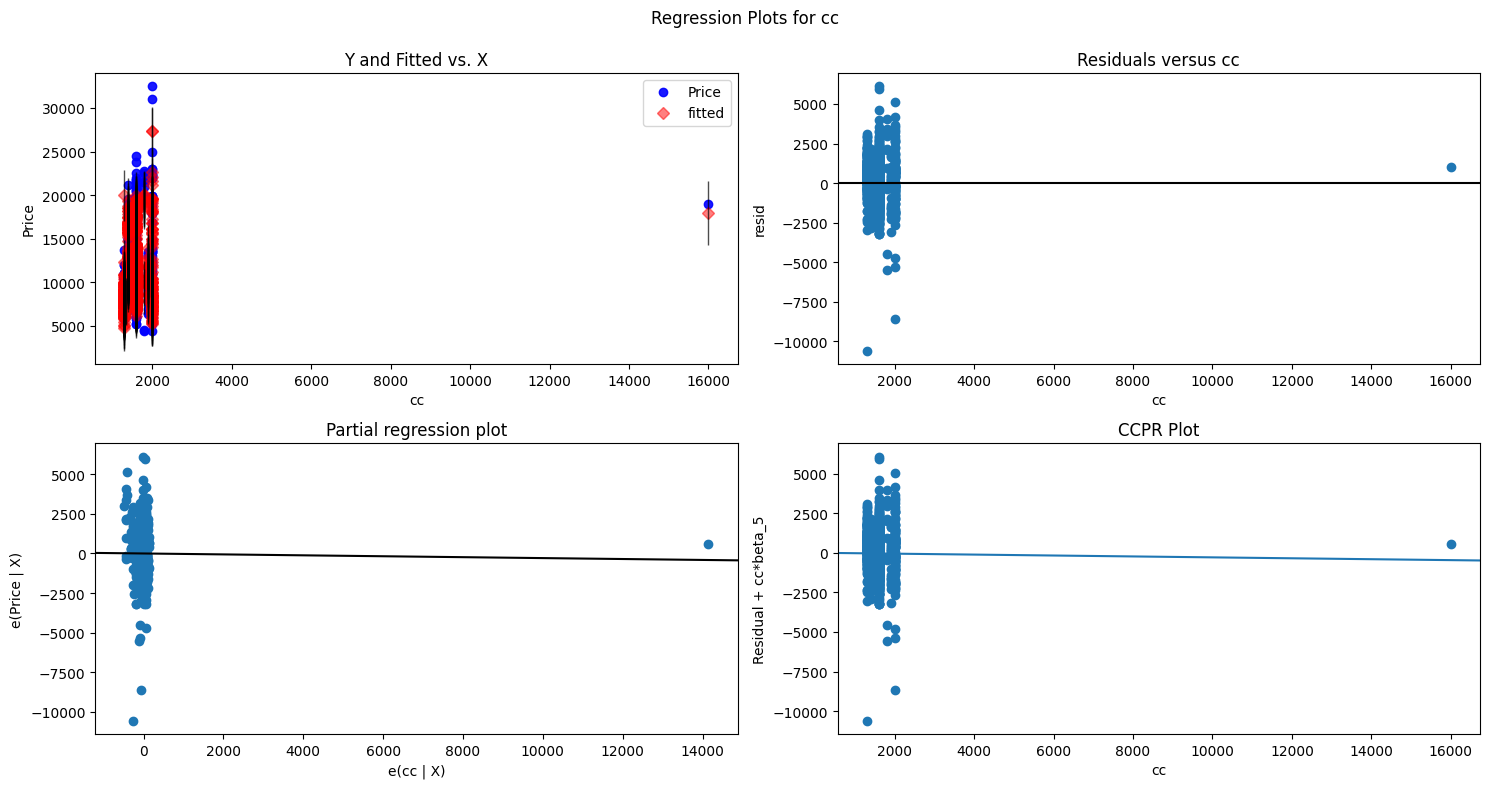

In [66]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "cc", fig=fig)
plt.show()

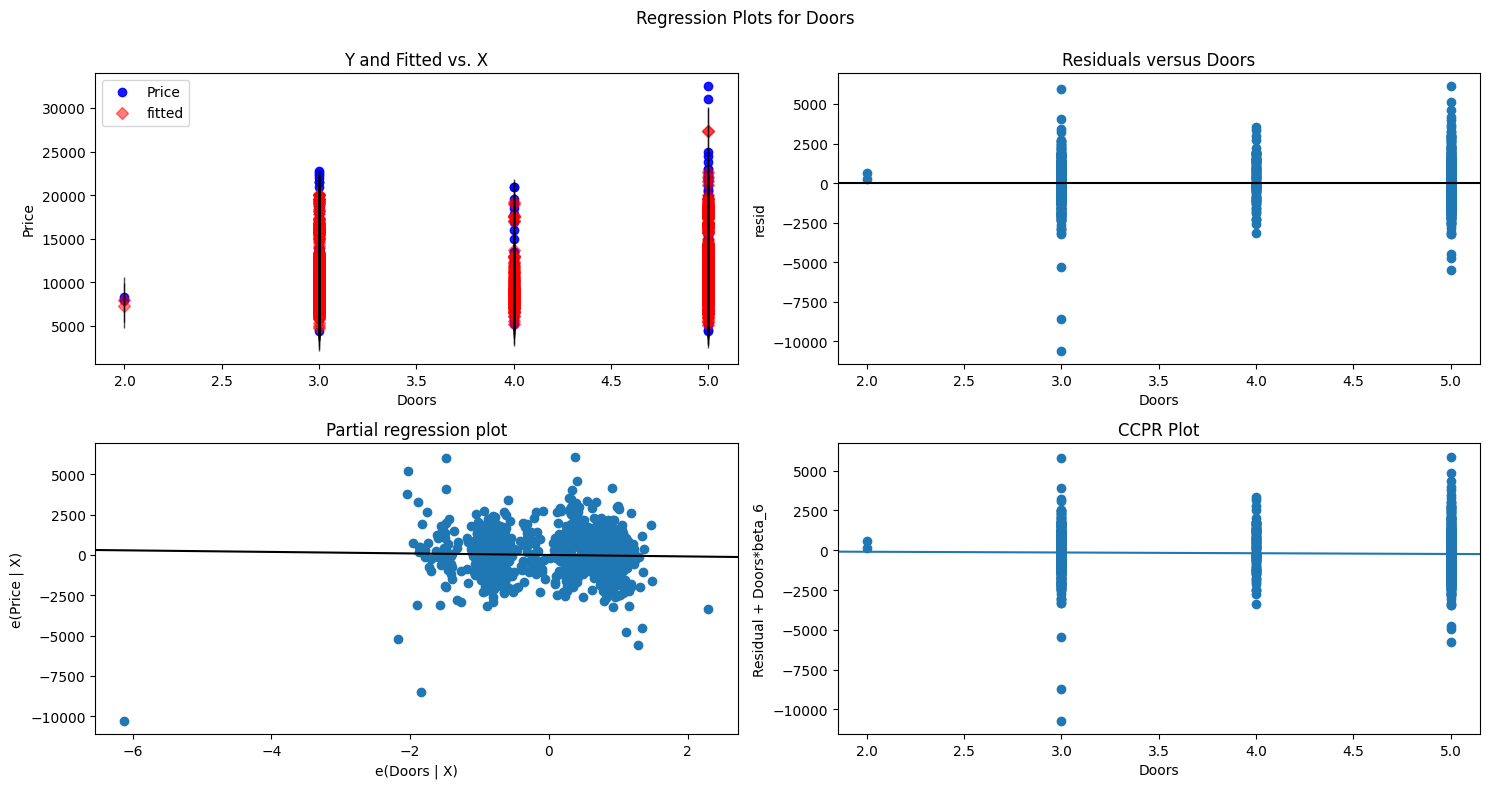

In [67]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "Doors", fig=fig)
plt.show()

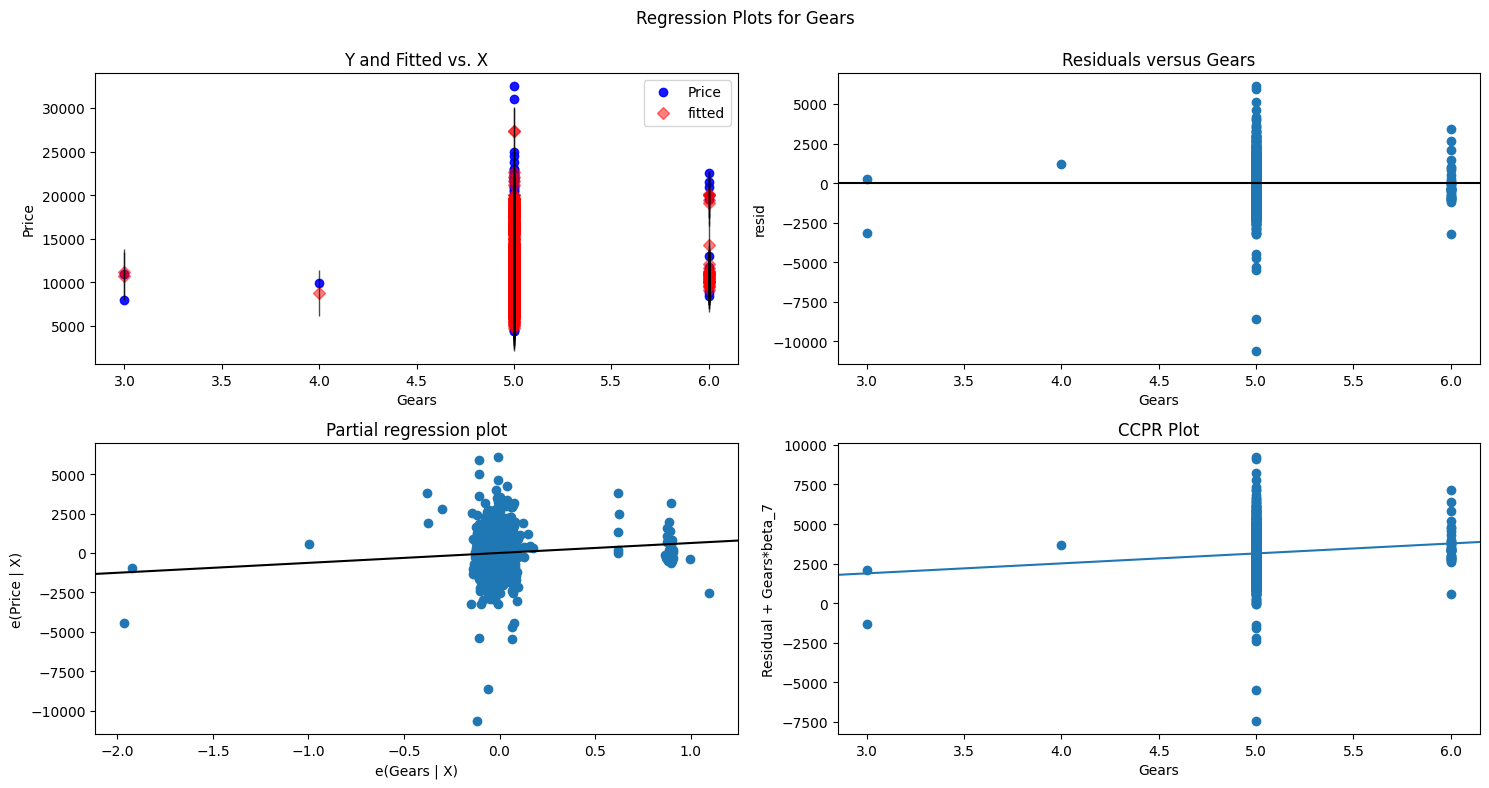

In [68]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "Gears", fig=fig)
plt.show()

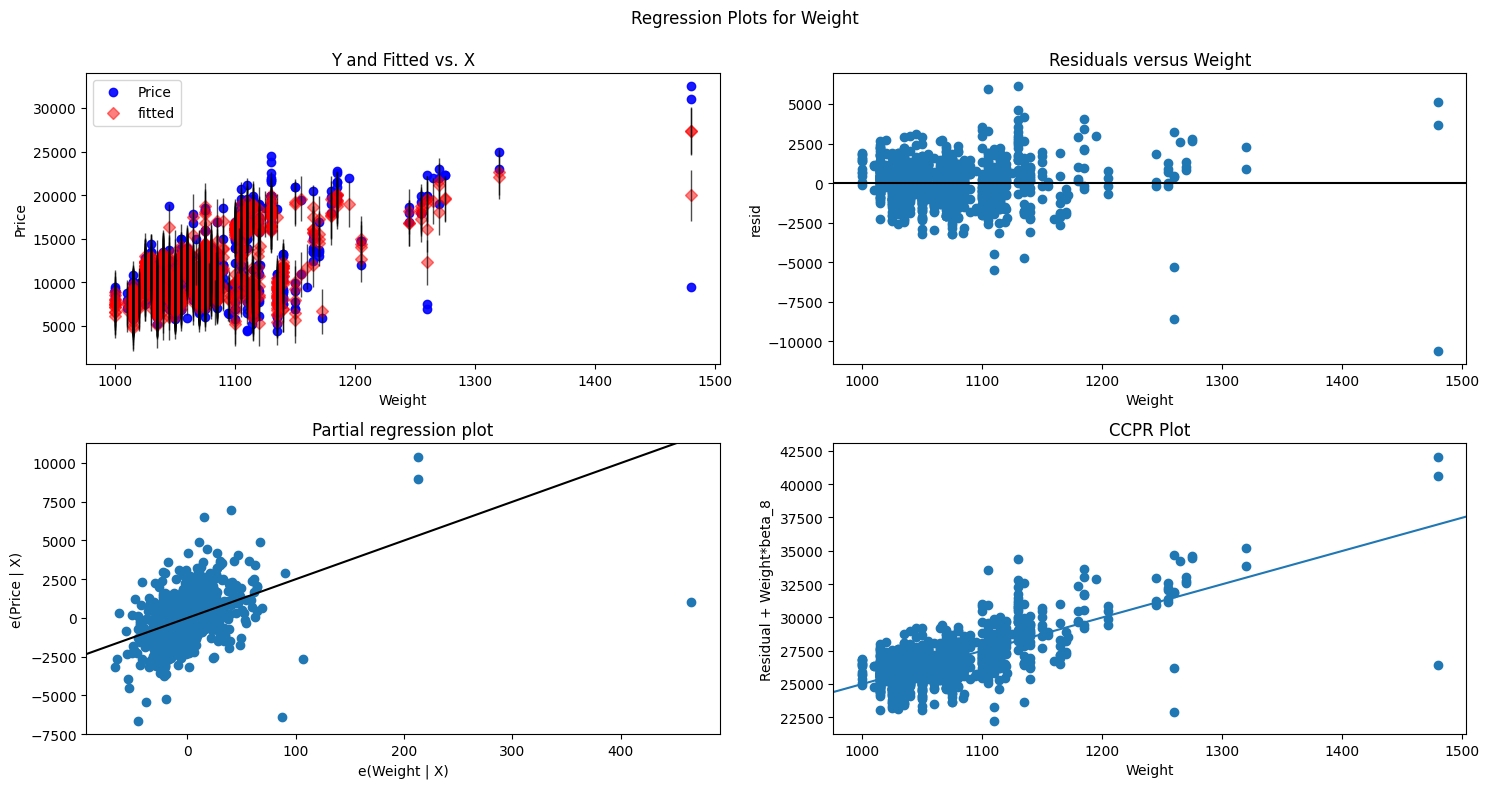

In [69]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "Weight", fig=fig)
plt.show()

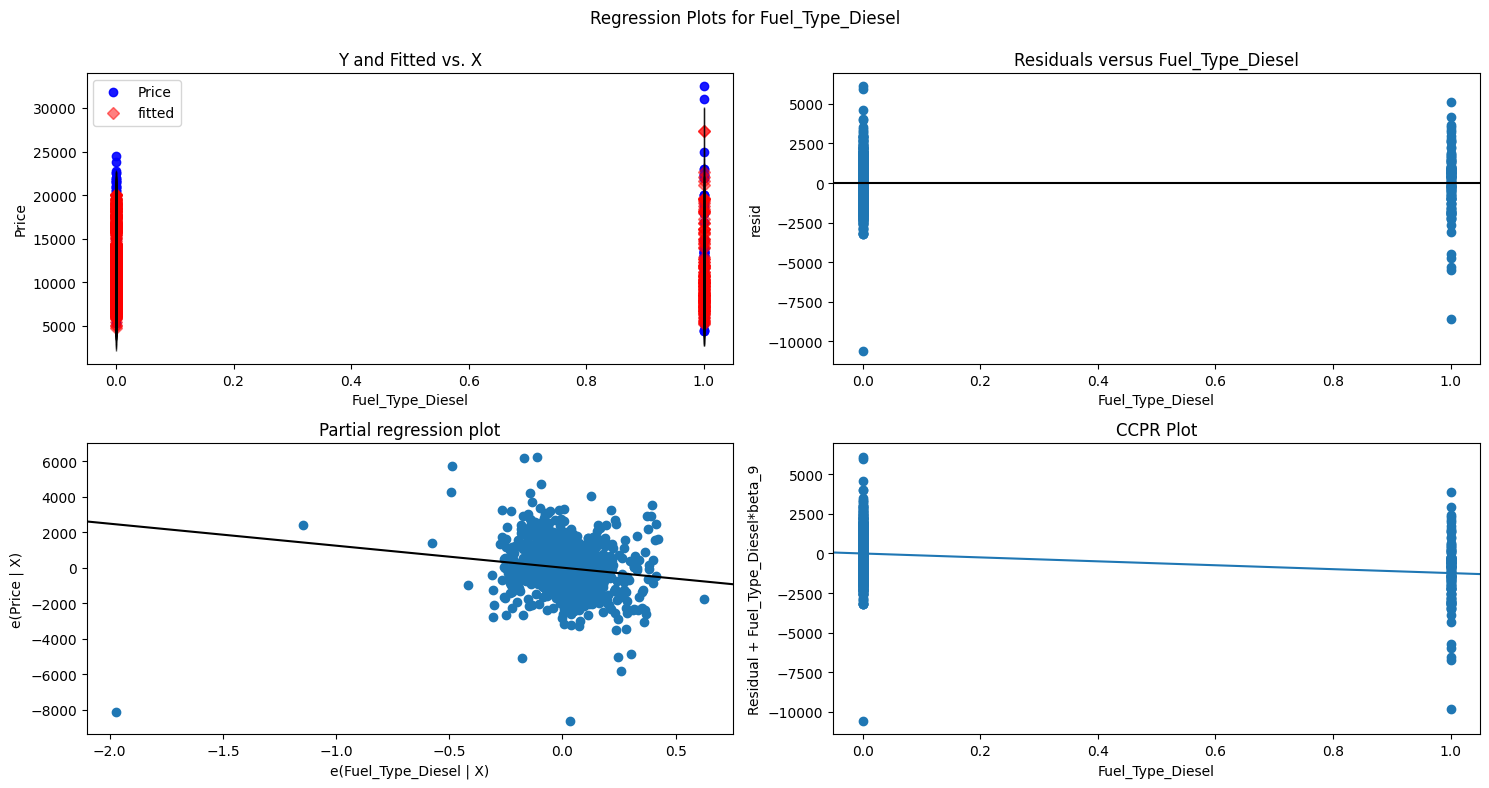

In [70]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "Fuel_Type_Diesel", fig=fig)
plt.show()

In [71]:
model_summary={

               'Model':['Model 1','Model 2','Model 3','Model 4', 'Model 5'],
               'R-squared': [model1.rsquared, model2.rsquared, model3.rsquared, model4.rsquared, model5.rsquared],
               'Adjusted R-squared': [model1.rsquared_adj, model2.rsquared_adj, model3.rsquared_adj, model4.rsquared_adj, model5.rsquared_adj]
}

summary_df = pd.DataFrame(model_summary)
summary_df

,Model,R-squared,Adjusted R-squared
0,Model 1,0.870264,0.869123
1,Model 2,0.810089,0.809591
2,Model 3,0.864284,0.863809
3,Model 4,0.868365,0.867324
4,Model 5,0.709671,0.708398


In [72]:
# model 4 is the best fit as the MLR assumptions are satisfied.
'''
Linear Regression Assumptions are:
1. Feature to Feature no correlation.
2. Feature to Target maximum correlation.
3. Error should be normally distribued.
4. Presence of Homoscedasticity.
5. NO correlation between error and independent var(features).
'''

'\nLinear Regression Assumptions are:\n1. Feature to Feature no correlation.\n2. Feature to Target maximum correlation.\n3. Error should be normally distribued.\n4. Presence of Homoscedasticity.\n5. NO correlation between error and independent var(features).\n'

## Test data

In [73]:
test_df_copy = test_df.copy().drop(columns = ['Fuel_Type_CNG','Fuel_Type_Petrol'],axis =1)

In [74]:
test_df_copy.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears',
       'Weight', 'Fuel_Type_Diesel'],
      dtype='object')

In [75]:
test_df_copy['Predicted_Price'] = model4.predict(test_df_copy)

In [76]:
from sklearn.metrics import r2_score, mean_squared_error

In [77]:
r2 = r2_score(test_df_copy.Price,test_df_copy.Predicted_Price)
mse = mean_squared_error(test_df_copy.Price,test_df_copy.Predicted_Price)

In [78]:
print(f'R squared : {r2}')
print(f'Mean Square Error : {mse}')

R squared : 0.8383490480354918
Mean Square Error : 2156874.5184458103


In [79]:
rmse = np.sqrt(mse)

In [80]:
rmse

1468.6301503257416

In [81]:
# Calculate residuals
test_df_copy['Residuals'] = test_df_copy['Price'] - test_df_copy['Predicted_Price']

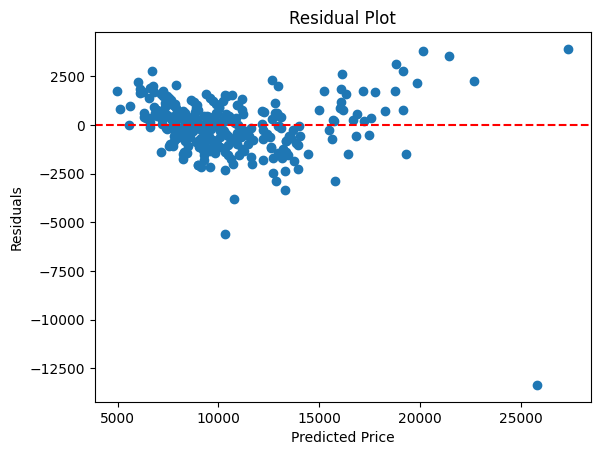

In [82]:
plt.scatter(test_df_copy['Predicted_Price'], test_df_copy['Residuals'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Heteroscedasticity observed

In [83]:
test_df2 = test_df.copy().drop(columns=['Fuel_Type_CNG','Fuel_Type_Petrol'],axis=1)

In [84]:
# taking log values of price, to make it easy to understand the plot
train_df2['Log_price'] = np.log(train_df2.Price)
test_df2['Log_price'] = np.log(test_df2.Price)

In [85]:
model_log = smf.ols('Log_price ~ KM + HP + cc + Gears + Weight', data=train_df2).fit()

In [86]:
test_df2['Predicted_log_price'] = model_log.predict(test_df2)

In [87]:
test_df2['Log_Residuals'] = test_df2['Log_price'] - test_df2['Predicted_log_price']

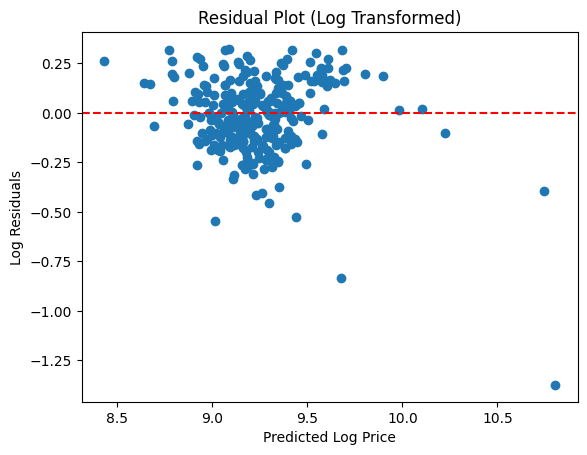

In [88]:
plt.scatter(test_df2['Predicted_log_price'], test_df2['Log_Residuals'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Log Price')
plt.ylabel('Log Residuals')
plt.title('Residual Plot (Log Transformed)')
plt.show()

#Homoscedasticity observed - satisfying the assumption of MLR

## Applying Lasso and Ridge on the Model

In [89]:
x_train = train_df.drop(columns='Price')
x_test = test_df.drop(columns='Price')
y_train = train_df.Price
y_test = test_df.Price

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
scaler = StandardScaler()

In [92]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [93]:
# Lasso
lasso =Lasso(alpha=1.0)
lasso.fit(x_train_scaled,y_train)
y_train_pred_lasso = lasso.predict(x_train_scaled)
y_test_pred_lasso = lasso.predict(x_test_scaled)

In [94]:
lasso_train_rmse = mean_squared_error(y_train, y_train_pred_lasso, squared=False)
lasso_test_rmse = mean_squared_error(y_test, y_test_pred_lasso, squared=False)
lasso_train_r2 = r2_score(y_train, y_train_pred_lasso)
lasso_test_r2 = r2_score(y_test, y_test_pred_lasso)

In [95]:
print(f'Lasso Regression - Train RMSE: {lasso_train_rmse}, Train R2: {lasso_train_r2}')
print(f'Lasso Regression - Test RMSE: {lasso_test_rmse}, Test R2: {lasso_test_r2}')

Lasso Regression - Train RMSE: 1303.3436529059284, Train R2: 0.8702635145611133
Lasso Regression - Test RMSE: 1483.3812723014637, Test R2: 0.8350854514157002


In [96]:
# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)
y_train_pred_ridge = ridge.predict(x_train_scaled)
y_test_pred_ridge = ridge.predict(x_test_scaled)

In [97]:
ridge_train_rmse = mean_squared_error(y_train, y_train_pred_ridge, squared=False)
ridge_test_rmse = mean_squared_error(y_test, y_test_pred_ridge, squared=False)
ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)

In [98]:
print(f'Ridge Regression - Train RMSE: {ridge_train_rmse}, Train R2: {ridge_train_r2}')
print(f'Ridge Regression - Test RMSE: {ridge_test_rmse}, Test R2: {ridge_test_r2}')

Ridge Regression - Train RMSE: 1303.3422797076962, Train R2: 0.8702637879407675
Ridge Regression - Test RMSE: 1483.474915641629, Test R2: 0.8350646292078032


In [99]:
from sklearn.linear_model import LassoCV, RidgeCV

# Lasso with cross-validation
lasso_cv = LassoCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=5)
lasso_cv.fit(x_train_scaled, y_train)
best_alpha_lasso = lasso_cv.alpha_
print(f'Best alpha for Lasso: {best_alpha_lasso}')

# Training Lasso with best alpha
lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(x_train_scaled, y_train)
y_train_pred_lasso_best = lasso_best.predict(x_train_scaled)
y_test_pred_lasso_best = lasso_best.predict(x_test_scaled)


lasso_best_train_rmse = mean_squared_error(y_train, y_train_pred_lasso_best, squared=False)
lasso_best_test_rmse = mean_squared_error(y_test, y_test_pred_lasso_best, squared=False)
lasso_best_train_r2 = r2_score(y_train, y_train_pred_lasso_best)
lasso_best_test_r2 = r2_score(y_test, y_test_pred_lasso_best)

print(f'Best Lasso Regression - Train RMSE: {lasso_best_train_rmse}, Train R2: {lasso_best_train_r2}')
print(f'Best Lasso Regression - Test RMSE: {lasso_best_test_rmse}, Test R2: {lasso_best_test_r2}')

Best alpha for Lasso: 100.0
Best Lasso Regression - Train RMSE: 1327.8137571275395, Train R2: 0.865346212400543
Best Lasso Regression - Test RMSE: 1428.6948490855425, Test R2: 0.8470208143354484


In [100]:
# Ridge with cross-validation
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=5)
ridge_cv.fit(x_train_scaled, y_train)
best_alpha_ridge = ridge_cv.alpha_
print(f'Best alpha for Ridge: {best_alpha_ridge}')

# Training Ridge with best alpha
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(x_train_scaled, y_train)
y_train_pred_ridge_best = ridge_best.predict(x_train_scaled)
y_test_pred_ridge_best = ridge_best.predict(x_test_scaled)


ridge_best_train_rmse = mean_squared_error(y_train, y_train_pred_ridge_best, squared=False)
ridge_best_test_rmse = mean_squared_error(y_test, y_test_pred_ridge_best, squared=False)
ridge_best_train_r2 = r2_score(y_train, y_train_pred_ridge_best)
ridge_best_test_r2 = r2_score(y_test, y_test_pred_ridge_best)

print(f'Best Ridge Regression - Train RMSE: {ridge_best_train_rmse}, Train R2: {ridge_best_train_r2}')
print(f'Best Ridge Regression - Test RMSE: {ridge_best_test_rmse}, Test R2: {ridge_best_test_r2}')


Best alpha for Ridge: 100.0
Best Ridge Regression - Train RMSE: 1320.737380455641, Train R2: 0.8667776207652969
Best Ridge Regression - Test RMSE: 1451.8639906433211, Test R2: 0.8420188558764646


## Interview Questions

## 1. **What is Normalization & Standardization and how is it helpful?**

Normalization and Standardization are two techniques used to rescale data, especially before applying machine learning algorithms. Many algorithms perform better when the data is on a similar scale, so these techniques are helpful in improving model performance.

Normalization:

Normalization (also called min-max scaling) is the process of rescaling data so that the values fall within a specific range, usually between 0 and 1.

When to use Normalization: Normalization is best when you know the data has a limited range or when you don’t assume that the data is normally distributed. It’s particularly useful in algorithms like K-Nearest Neighbors (KNN) and neural networks, where distance calculations or weights are affected by the scale of the data.

Standardization:

Standardization (also called z-score normalization) transforms the data so that it has a mean of 0 and a standard deviation of 1. This technique is useful when the data follows a normal (Gaussian) distribution.

When to use Standardization: Standardization is useful when the data is normally distributed or when the algorithm assumes normally distributed data, such as in logistic regression, linear regression, and support vector machines (SVMs).

Normalization and Standardization are helpful because they improve model performance, helps in faster convergence, handles outliers and maintains consistency in features.

## **2. What techniques can be used to address multicollinearity in multiple linear regression?**

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated.

This can lead to problems such as:

Unstable estimates of regression coefficients.
Large standard errors, making it hard to determine the significance of variables.
Overfitting, where the model may fit the training data well but performs poorly on new data.

Some techniques to address multicollinearity are:
1. Remove Highly Correlated Predictors:

One of the simplest ways to deal with multicollinearity is to remove one or more of the highly correlated variables. You can check for multicollinearity using correlation matrices or Variance Inflation Factor (VIF). If two variables are strongly correlated (e.g., correlation > 0.8), it’s a good idea to remove one of them to reduce redundancy.

2. Combine Correlated Variables:

Another technique is to combine the correlated variables into a single feature. For example, if two variables are highly correlated and represent similar information, you can average or sum them to create a new feature, reducing the number of predictors in the model.

3. Principal Component Analysis (PCA):

PCA is a dimensionality reduction technique that transforms the correlated variables into a set of uncorrelated components called principal components. These components capture the maximum variance in the data and can be used as new predictors, addressing multicollinearity.

4. Ridge Regression:

Ridge regression is a regularization technique that adds a penalty to the size of the coefficients. This helps shrink the coefficients of correlated variables and reduces the impact of multicollinearity. It’s especially useful when multicollinearity is present but you still want to keep all predictors in the model.

5. Lasso Regression:

Similar to ridge regression, lasso regression adds a penalty term to the regression model. However, lasso not only shrinks the coefficients but can also set some of them to zero, effectively removing variables from the model. This helps in selecting only the most important features and reducing multicollinearity.

6. Variance Inflation Factor (VIF) Threshold:

The VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity. A rule of thumb is that a VIF value greater than 5 or 10 indicates high multicollinearity. We can systematically remove variables with high VIF values to improve the model.
